In [11]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
import plotly.express as px

#### Making our search space for croston
* Using a logspace base 100, to create values between 0.01 and 1
* Closely spaced near the bottom of the space and further apart towards 1.

In [12]:
search_space = np.logspace(start=0.01,stop=1.0,endpoint=True, base=100, num=8)/100
search_space = np.round(search_space,3)
display(search_space)
px.line(search_space)

array([0.01 , 0.02 , 0.039, 0.074, 0.142, 0.272, 0.521, 1.   ])

#### Checking that pycaret's distribution is implemented as expected


In [13]:
from pycaret.distributions import UniformDistribution

new_search_space = UniformDistribution(0.01,1,log=True)
search_space_array:np.ndarray = new_search_space.get_base().rvs(size=500)

Histogram

In [4]:
px.histogram(search_space_array)

ECDF

In [5]:
px.ecdf(new_search_space.get_base().rvs(size=500))

Distributions seem satisfactory!

### Initial POC of croston

<AxesSubplot:xlabel='Period'>

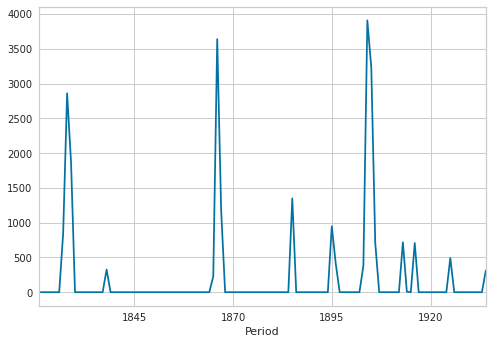

In [14]:
# Get any dataset as not really important for the demo what it is as we will transform!
y = get_data("lynx", verbose=False)
# clip the dataset and reduce the scale by the same amount to make a dataset with a lot of zeros / intermittent style
clip_number = np.quantile(y,0.84)
y_intermittent= (y.clip(lower=clip_number) - clip_number )
y_intermittent.head()
y_intermittent.plot()

In [15]:
y_intermittent.min()

0.0

#### Setup basic pycaret ts experiment

In [7]:
FORECAST_HORIZON=5
exp = TimeSeriesExperiment()

exp.setup(data=y_intermittent , fh=FORECAST_HORIZON, fold=5, fold_strategy='expanding', session_id=55)

,Description,Value
0,session_id,55
1,Original Data,"(114, 1)"
2,Missing Values,False
3,Transformed Train Set,"(109,)"
4,Transformed Test Set,"(5,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,5
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,1
9,Seasonality Detected,False


#### Training/ model comparison
##### Compare models - sort by smape

In [8]:
best = exp.compare_models(turbo=True, sort='SMAPE', include=['ets','croston'])

ValueError: Estimator croston Not Available. Please see docstring for list of available estimators.

##### Create croston

In [9]:
croston = exp.create_model('croston')

ValueError: Estimator croston not available. Please see docstring for list of available estimators.

##### Plot Croston

In [ ]:
exp.plot_model(croston)

##### Tune Croston

In [ ]:
tuned_croston = exp.tune_model(croston)

##### Plot tuned croston

In [ ]:
exp.plot_model(tuned_croston)

In [ ]:
print(croston)
print(tuned_croston)

<AxesSubplot:xlabel='Period'>

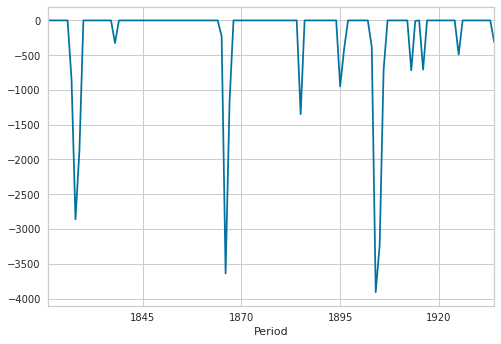

In [21]:
from pycaret.datasets import get_data
import pandas as pd
from sktime.forecasting.croston import Croston

# Get any dataset as not really important for the demo what it is as we will transform!
y = get_data("lynx", verbose=False)
# clip the dataset and reduce the scale by the same amount to make a dataset with a lot of zeros / intermittent style
clip_number = np.quantile(y,0.84)
#clip and turn negative
y_neg= -(y.clip(lower=clip_number) - clip_number )
# init model
forecaster = Croston(smoothing=0.1)
# print training data
print(y_neg)
# fit the model
forecaster.fit(y_neg)
# create prediction
y_pred = forecaster.predict(fh=[i for i in range(5)])
print(y_pred)

Period
1821     -0.00
1822     -0.00
1823     -0.00
1824     -0.00
1825     -0.00
         ...  
1930     -0.00
1931     -0.00
1932     -0.00
1933     -0.00
1934   -313.48
Freq: A-DEC, Name: Number of Lynx trappings, Length: 114, dtype: float64
1934   -0.0
1935   -0.0
1936   -0.0
1937   -0.0
1938   -0.0
Freq: A-DEC, dtype: float64


In [ ]:
neg_croston = neg_exp.compare_models()

In [ ]:
neg_exp.plot_model(neg_croston)

### Does sktime Croston handle negative values ?
(no)

NameError: name 'y_neg' is not defined

In [ ]:
y_pred

Answer: NO